In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import wordcloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SyntaxError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Daily_Routine_Code/Natural_Language_Processing/apple-twitter-sentiment-texts.csv', encoding = "ISO-8859-1",header=0)
df.tail()

,ï»¿text,sentiment
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0
1629,The iPhone 6 May Have A Longer Upgrade Cycle -...,-1


In [ ]:
df = df[df['ï»¿text'].notnull()]

In [ ]:
df.rename(columns={"ï»¿text":"tweet","sentiment":"category"},inplace=True)
df.head(5)

,tweet,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     1630 non-null   object
 1   category  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.2+ KB


In [ ]:
# df=df.iloc[0:1000]

In [ ]:
len(df)

1630

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemma=WordNetLemmatizer()
df["tweet_lemma"]=df["tweet"].apply(lambda x:  ' '.join([lemma.lemmatize(word,'v') for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
print(df["tweet_lemma"])

0       Wow. Yall needa step it up @Apple RT @heynyla:...
1       What Happened To Apple Inc? http://t.co/FJEXI3...
2       Thank u @apple I can now compile all of the pi...
3       The oddly uplift story of the Apple co-founder...
4       @apple can i exchange my iphone for a differen...
                              ...                        
1625       Those** PICK UP THE SLACK YOU FUCK BOYS @Apple
1626    Finally get my iPhone 6 in the mail and it com...
1627    @umo_games @Apple end up get a new computer an...
1628    The 19-Year-Old #WizKid Who Turned Down @Apple...
1629    The iPhone 6 May Have A Longer Upgrade Cycle -...
Name: tweet_lemma, Length: 1630, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 1629
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        1630 non-null   object
 1   category     1630 non-null   int64 
 2   tweet_lemma  1630 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.9+ KB


In [ ]:
stop = stopwords.words('english')

In [ ]:
df['tweet_without_stopwords'] = df['tweet_lemma'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop)]))
print(df)

                                                  tweet  ...                            tweet_without_stopwords
0     Wow. Yall needa step it up @Apple RT @heynyla:...  ...  wow. yall needa step @apple rt @heynyla: music...
1     What Happened To Apple Inc?   http://t.co/FJEX...  ...  what happened to apple inc? http://t.co/fjexi3...
2     Thank u @apple I can now compile all of the pi...  ...  thank u @apple i compile pics communicate one ...
3     The oddly uplifting story of the Apple co-foun...  ...  the oddly uplift story apple co-founder sell s...
4     @apple can i exchange my iphone for a differen...  ...  @apple exchange iphone different color lmao ch...
...                                                 ...  ...                                                ...
1625     Those** PICK UP THE SLACK YOU FUCK BOYS @Apple  ...     those** pick up the slack you fuck boys @apple
1626  Finally got my iPhone 6 in the mail and it com...  ...  finally get iphone 6 mail come box bust sc

In [ ]:
df.head()

,tweet,category,tweet_lemma,tweet_without_stopwords
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...
2,Thank u @apple I can now compile all of the pi...,1,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...
3,The oddly uplifting story of the Apple co-foun...,0,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...
4,@apple can i exchange my iphone for a differen...,0,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...


In [ ]:
def clean_tweets(tweet):
    # processedText = []

    # # Create Lemmatizer and Stemmer.
    # wordLemm = WordNetLemmatizer()

    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    # tweet = re.sub(r"@[A-Za-z0-9_]+","", tweet)
    # tweet = re.sub(r"#[A-Za-z0-9_]+","", tweet)
   #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    # #remove tags
    # tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)
    # tweet = re.sub(r'#\w+ ?', '', tweet)
    # tweet = re.sub(r'http\S+', '', tweet)
    
    # tweetwords = ''
    # for word in tweet.split():
    #         # Checking if the word is a stopword.
    #         #if word not in stopwordlist:
    #         if len(word)>1:
    #             # Lemmatizing the word.
    #             word = wordLemm.lemmatize(word)
    #             tweetwords += (word+' ')
    #         processedText.append(tweetwords)

    return tweet

In [ ]:
df['tweet_clean'] = df['tweet_without_stopwords'].apply(lambda x: clean_tweets(x))

In [ ]:
df.head()

,tweet,category,tweet_lemma,tweet_without_stopwords,tweet_clean
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...
1,What Happened To Apple Inc? http://t.co/FJEX...,0,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple
2,Thank u @apple I can now compile all of the pi...,1,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place
3,The oddly uplifting story of the Apple co-foun...,0,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...
4,@apple can i exchange my iphone for a differen...,0,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind


In [ ]:
df["tweet_clean"].head()

0    wow yall needa step rt music snapchat damn tim...
1               what happened to apple inc aapl apple 
2        thank u i compile pics communicate one place 
3    the oddly uplift story apple co founder sell s...
4     exchange iphone different color lmao change mind
Name: tweet_clean, dtype: object

In [ ]:
df['sentiment']=''
df.loc[df.category==1,'sentiment']='POSITIVE'
df.loc[df.category==0, 'sentiment']='NEUTRAL'
df.loc[df.category==-1, 'sentiment']='NEGATIVE'

In [ ]:
df.head()

,tweet,category,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE
1,What Happened To Apple Inc? http://t.co/FJEX...,0,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL
2,Thank u @apple I can now compile all of the pi...,1,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE
3,The oddly uplifting story of the Apple co-foun...,0,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL
4,@apple can i exchange my iphone for a differen...,0,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL


# Analyse Sentiment Using VADER

In [ ]:
# Inisialisasi Library VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Menghitung Skor Sentimen suatu Teks
contoh ="This was a great movie"
sid.polarity_scores(contoh)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [ ]:
contoh ="This was a great movie"
sid.polarity_scores(contoh)

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [ ]:
df['scores'] = df['tweet'].apply(lambda x: sid.polarity_scores(x))
df.head()

,tweet,category,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,scores
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE,"{'neg': 0.104, 'neu': 0.654, 'pos': 0.242, 'co..."
1,What Happened To Apple Inc? http://t.co/FJEX...,0,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Thank u @apple I can now compile all of the pi...,1,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp..."
3,The oddly uplifting story of the Apple co-foun...,0,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,@apple can i exchange my iphone for a differen...,0,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp..."


In [ ]:
df.drop(['scores','category'],axis=1,inplace=True)

In [ ]:
df.head(5)

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE
1,What Happened To Apple Inc? http://t.co/FJEX...,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL
2,Thank u @apple I can now compile all of the pi...,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE
3,The oddly uplifting story of the Apple co-foun...,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL
4,@apple can i exchange my iphone for a differen...,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL


In [ ]:
def model_performance(true_labels,predicted_labels,classes):
  conf_matrix=confusion_matrix(true_labels,predicted_labels)
  df_cm=pd.DataFrame(conf_matrix,index=classes,columns=classes)
  print("Accuracy: ",accuracy_score(true_labels,predicted_labels))
  print("Precison: ", precision_score(true_labels,predicted_labels, average='weighted'))
  print("Recall: ", recall_score(true_labels,predicted_labels, average='weighted'))
  print("F1 Score: ", f1_score(true_labels,predicted_labels, average='weighted'))
  print("Model Report: \n___________________________________________________",)
  print( classification_report(true_labels,predicted_labels))

  sns.heatmap(df_cm,annot=True, cmap="YlGnBu",fmt = '')

  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
def func_intensity_analyser(review,threshold=0.1,verbose=False):
  sid=SentimentIntensityAnalyzer()
  scores=sid.polarity_scores(review)

  agg_score=scores['compound']
  final_sentiment='POSITIVE' if agg_score>threshold else "NEUTRAL" if agg_score==threshold else 'NEGATIVE'
  if verbose:
    positive = round(scores['pos'],2)*100
    final= round(agg_score,2)*100
    negative=round(scores['neg'],2)*100
    neutral =round(scores['neu'],2)*100

    print(f'POSITIVE : {positive}%')
    print(f'NEGATIVE : {negative}%')
    print(f'NEUTRAL : {neutral}%')
    print(f'FINAL : {final}')
    print(f'SENTIMENT : {final_sentiment}')
  
  return final_sentiment

In [ ]:
df['scores'] = df['tweet_clean'].apply(lambda x: sid.polarity_scores(x))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type_VADER']=''
df.loc[df.compound>=0.05,'sentiment_type_VADER']='POSITIVE'
df.loc[(df.compound>-0.05) & (df.compound<0.05),'sentiment_type_VADER']='NEUTRAL'
df.loc[df.compound<=-0.05,'sentiment_type_VADER']='NEGATIVE'
df.head()

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,predicted_VADER,scores,compound,sentiment_type_VADER
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE,POSITIVE,"{'neg': 0.159, 'neu': 0.471, 'pos': 0.371, 'co...",0.5574,POSITIVE
1,What Happened To Apple Inc? http://t.co/FJEX...,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,Thank u @apple I can now compile all of the pi...,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,POSITIVE
3,The oddly uplifting story of the Apple co-foun...,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4,@apple can i exchange my iphone for a differen...,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL,POSITIVE,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.5994,POSITIVE


In [ ]:
df[(df.sentiment=="POSITIVE")& (df.sentiment_type_VADER=="POSITIVE")]

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,predicted_VADER,scores,compound,sentiment_type_VADER,scores_without_clean,sentiment_type_VADER_no_clean,sentiment_type_TextBlob,polarity_TextBlob
2,Thank u @apple I can now compile all of the pi...,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,POSITIVE,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",POSITIVE,NEUTRAL,0.000000
34,RT @SwiftKey: We're so excited to be named to ...,RT @SwiftKey: We're so excite to be name to @A...,rt @swiftkey: we're excite name @apple's 'app ...,rt we re excite name app store best list year ...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.8229,POSITIVE,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",POSITIVE,POSITIVE,1.000000
85,@apple #apple tech support is so nice. Free st...,@apple #apple tech support be so nice. Free st...,@apple #apple tech support nice. free stuff!! ...,apple tech support nice free stuff sucks ring...,POSITIVE,POSITIVE,"{'neg': 0.145, 'neu': 0.347, 'pos': 0.509, 'co...",0.8154,POSITIVE,"{'neg': 0.107, 'neu': 0.469, 'pos': 0.424, 'co...",POSITIVE,POSITIVE,0.233333
95,#AAPL providing another great entry point &lt;...,#AAPL provide another great entry point &lt; $115,#aapl provide another great entry point &lt; $115,aapl provide another great entry point lt,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,POSITIVE,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",POSITIVE,POSITIVE,0.800000
111,The 10 biggest differences between #Mac and #P...,The 10 biggest differences between #Mac and #P...,"the 10 biggest differences #mac #pc. yep, i'll...",the biggest differences mac pc yep i ll stick ...,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.3595,POSITIVE,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",POSITIVE,NEUTRAL,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,#apple earns more #profit in on quarter than #...,#apple earn more #profit in on quarter than #a...,#apple earn #profit quarter #amazon earn lifet...,apple earn profit quarter amazon earn lifetim...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'comp...",0.6705,POSITIVE,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",POSITIVE,POSITIVE,0.100000
1583,Finally got my iPhone 6! @apple =) Such a reli...,Finally get my iPhone 6! @apple =) Such a reli...,finally get iphone 6! @apple =) such relief us...,finally get iphone such relief use months,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.7835,POSITIVE,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",POSITIVE,NEUTRAL,0.000000
1598,Yay @Apple customer support was super nice and...,Yay @Apple customer support be super nice and ...,yay @apple customer support super nice helpful...,yay customer support super nice helpful imessa...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.161, 'pos': 0.839, 'comp...",0.9393,POSITIVE,"{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'comp...",POSITIVE,POSITIVE,0.466667
1610,RT @shannonmmiller: Love the @Apple is support...,RT @shannonmmiller: Love the @Apple be support...,rt @shannonmmiller: love @apple support #houro...,rt love support hourofcode workshops,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.8858,POSITIVE,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",POSITIVE,POSITIVE,0.500000


Accuracy:  0.5852760736196319
Precison:  0.7158460229752732
Recall:  0.5852760736196319
F1 Score:  0.6199407387994432
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.79      0.60      0.68       686
     NEUTRAL       0.74      0.52      0.61       801
    POSITIVE       0.23      0.85      0.36       143

    accuracy                           0.59      1630
   macro avg       0.58      0.66      0.55      1630
weighted avg       0.72      0.59      0.62      1630



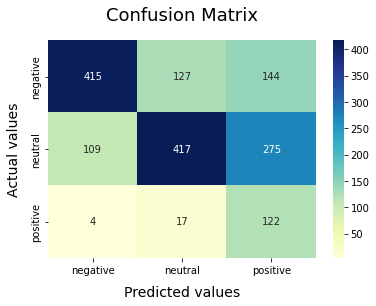

In [ ]:
# Hasilnya lebih bagus malah
model_performance(df.sentiment,df.sentiment_type_VADER,classes=["negative","neutral","positive"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 1629
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet                    1630 non-null   object 
 1   tweet_lemma              1630 non-null   object 
 2   tweet_without_stopwords  1630 non-null   object 
 3   tweet_clean              1630 non-null   object 
 4   sentiment                1630 non-null   object 
 5   predicted_VADER          1630 non-null   object 
 6   scores                   1630 non-null   object 
 7   compound                 1630 non-null   float64
 8   sentiment_type_VADER     1630 non-null   object 
dtypes: float64(1), object(8)
memory usage: 127.3+ KB


### Vader tanpa di pre-processing

In [ ]:
df['scores_without_clean'] = df['tweet'].apply(lambda x: sid.polarity_scores(x))
df['compound'] = df['scores_without_clean'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type_VADER_no_clean']=''
df.loc[df.compound>=0.05,'sentiment_type_VADER_no_clean']='POSITIVE'
df.loc[(df.compound>-0.05) & (df.compound<0.05),'sentiment_type_VADER_no_clean']='NEUTRAL'
df.loc[df.compound<=-0.05,'sentiment_type_VADER_no_clean']='NEGATIVE'
df.head()

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,predicted_VADER,scores,compound,sentiment_type_VADER,scores_without_clean,sentiment_type_VADER_no_clean,sentiment_type_TextBlob,polarity_TextBlob
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE,POSITIVE,"{'neg': 0.159, 'neu': 0.471, 'pos': 0.371, 'co...",0.5574,POSITIVE,"{'neg': 0.104, 'neu': 0.654, 'pos': 0.242, 'co...",POSITIVE,POSITIVE,0.100000
1,What Happened To Apple Inc? http://t.co/FJEX...,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,NEUTRAL,0.000000
2,Thank u @apple I can now compile all of the pi...,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,POSITIVE,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",POSITIVE,NEUTRAL,0.000000
3,The oddly uplifting story of the Apple co-foun...,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,NEGATIVE,-0.166667
4,@apple can i exchange my iphone for a differen...,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL,POSITIVE,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.5994,POSITIVE,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",POSITIVE,POSITIVE,0.300000


Accuracy:  0.6067484662576688
Precison:  0.7276096660559279
Recall:  0.6067484662576688
F1 Score:  0.6401255228939516
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.80      0.61      0.70       686
     NEUTRAL       0.75      0.56      0.64       801
    POSITIVE       0.24      0.84      0.37       143

    accuracy                           0.61      1630
   macro avg       0.60      0.67      0.57      1630
weighted avg       0.73      0.61      0.64      1630



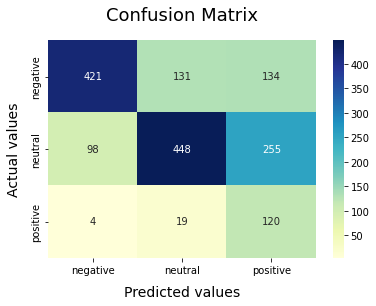

In [ ]:
# Hasilnya lebih bagus malah
model_performance(df.sentiment,df.sentiment_type_VADER_no_clean,classes=["negative","neutral","positive"])

# Analysis Sentiment Using TextBlob

In [ ]:
from textblob import TextBlob
import numpy as np

In [ ]:
def sentiment_textblob(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'POSITIVE'
    elif analysis.sentiment.polarity == 0:
        return 'NEUTRAL'
    else:
        return 'NEGATIVE'

def polarity_textblob(tweet):
  analysis = TextBlob(tweet)
  return analysis.sentiment.polarity

In [ ]:
# We create a column with the result of the analysis:
df['sentiment_type_TextBlob'] = np.array([ sentiment_textblob(tweet) for tweet in df['tweet_clean'] ])
df['polarity_TextBlob'] = np.array([ polarity_textblob(tweet) for tweet in df['tweet_clean'] ])

# We display the updated dataframe with the new column:
display(df.head())

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,predicted_VADER,scores,compound,sentiment_type_VADER,scores_without_clean,sentiment_type_VADER_no_clean,sentiment_type_TextBlob,polarity_TextBlob
0,Wow. Yall needa step it up @Apple RT @heynyla:...,Wow. Yall needa step it up @Apple RT @heynyla:...,wow. yall needa step @apple rt @heynyla: music...,wow yall needa step rt music snapchat damn tim...,NEGATIVE,POSITIVE,"{'neg': 0.159, 'neu': 0.471, 'pos': 0.371, 'co...",0.5574,POSITIVE,"{'neg': 0.104, 'neu': 0.654, 'pos': 0.242, 'co...",POSITIVE,POSITIVE,0.100000
1,What Happened To Apple Inc? http://t.co/FJEX...,What Happened To Apple Inc? http://t.co/FJEXI3...,what happened to apple inc? http://t.co/fjexi3...,what happened to apple inc aapl apple,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,NEUTRAL,0.000000
2,Thank u @apple I can now compile all of the pi...,Thank u @apple I can now compile all of the pi...,thank u @apple i compile pics communicate one ...,thank u i compile pics communicate one place,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.3612,POSITIVE,"{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",POSITIVE,NEUTRAL,0.000000
3,The oddly uplifting story of the Apple co-foun...,The oddly uplift story of the Apple co-founder...,the oddly uplift story apple co-founder sell s...,the oddly uplift story apple co founder sell s...,NEUTRAL,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,NEGATIVE,-0.166667
4,@apple can i exchange my iphone for a differen...,@apple can i exchange my iphone for a differen...,@apple exchange iphone different color lmao ch...,exchange iphone different color lmao change mind,NEUTRAL,POSITIVE,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.5994,POSITIVE,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",POSITIVE,POSITIVE,0.300000


In [ ]:
df[(df.sentiment=='POSITIVE') & (df.sentiment_type_TextBlob=="POSITIVE")]

,tweet,tweet_lemma,tweet_without_stopwords,tweet_clean,sentiment,predicted_VADER,scores,compound,sentiment_type_VADER,scores_without_clean,sentiment_type_VADER_no_clean,sentiment_type_TextBlob,polarity_TextBlob
33,Finally! Brooklyn Is Getting Its Own #Apple St...,Finally! Brooklyn Is Getting Its Own #Apple St...,finally! brooklyn is getting its own #apple st...,finally brooklyn is getting its own apple stor...,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,POSITIVE,0.300000
34,RT @SwiftKey: We're so excited to be named to ...,RT @SwiftKey: We're so excite to be name to @A...,rt @swiftkey: we're excite name @apple's 'app ...,rt we re excite name app store best list year ...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.8229,POSITIVE,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",POSITIVE,POSITIVE,1.000000
85,@apple #apple tech support is so nice. Free st...,@apple #apple tech support be so nice. Free st...,@apple #apple tech support nice. free stuff!! ...,apple tech support nice free stuff sucks ring...,POSITIVE,POSITIVE,"{'neg': 0.145, 'neu': 0.347, 'pos': 0.509, 'co...",0.8154,POSITIVE,"{'neg': 0.107, 'neu': 0.469, 'pos': 0.424, 'co...",POSITIVE,POSITIVE,0.233333
94,Apple's iPhone 6 Plus Amazingly Captures 41% o...,Apple's iPhone 6 Plus Amazingly Captures 41% o...,apple's iphone 6 plus amazingly captures 41% p...,apple s iphone plus amazingly captures phablet...,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,POSITIVE,0.442857
95,#AAPL providing another great entry point &lt;...,#AAPL provide another great entry point &lt; $115,#aapl provide another great entry point &lt; $115,aapl provide another great entry point lt,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,POSITIVE,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...",POSITIVE,POSITIVE,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,Photo: Yaaass. Shoutout to @apple.holidays and...,Photo: Yaaass. Shoutout to @apple.holidays and...,photo: yaaass. shoutout @apple.holidays @steve...,photo yaaass shoutout amazing iphone stevejobs,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.6239,POSITIVE,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",POSITIVE,POSITIVE,0.600000
1581,#apple earns more #profit in on quarter than #...,#apple earn more #profit in on quarter than #a...,#apple earn #profit quarter #amazon earn lifet...,apple earn profit quarter amazon earn lifetim...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'comp...",0.6705,POSITIVE,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",POSITIVE,POSITIVE,0.100000
1586,First tweet from my new @apple #iPhone 6 Plus....,First tweet from my new @apple #iPhone 6 Plus....,first tweet new @apple #iphone 6 plus. #newtoy,first tweet new iphone plus newtoy,POSITIVE,NEGATIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEUTRAL,POSITIVE,0.193182
1598,Yay @Apple customer support was super nice and...,Yay @Apple customer support be super nice and ...,yay @apple customer support super nice helpful...,yay customer support super nice helpful imessa...,POSITIVE,POSITIVE,"{'neg': 0.0, 'neu': 0.161, 'pos': 0.839, 'comp...",0.9393,POSITIVE,"{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'comp...",POSITIVE,POSITIVE,0.466667


Accuracy:  0.5521472392638037
Precison:  0.6902079656514812
Recall:  0.5521472392638037
F1 Score:  0.5849428240053802
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    NEGATIVE       0.84      0.46      0.59       686
     NEUTRAL       0.65      0.61      0.63       801
    POSITIVE       0.19      0.69      0.30       143

    accuracy                           0.55      1630
   macro avg       0.56      0.58      0.51      1630
weighted avg       0.69      0.55      0.58      1630



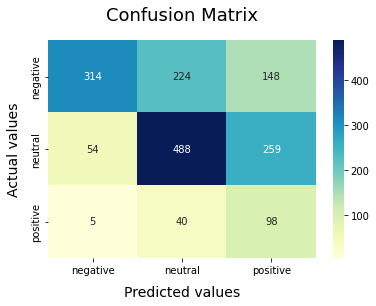

In [ ]:
# Hasilnya lebih bagus malah
model_performance(df.sentiment,df.sentiment_type_TextBlob,classes=["negative","neutral","positive"])